In [35]:
#Resolviendo el atractor de Lorenz mediante el método de Runge Kutta 4

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Defiendo el método de Runge Kutta 4 a partir de una función
def Runge_Kutta4(f, X_0, t_0, t_f, h):
    
    n = int((t_f - t_0) / h + 1)    #Número de pasos
    t = np.linspace(t_0, t_f, n)    #Valores de t
    X = np.zeros([n, len(X_0)])     #Matriz de n x número de entradas
    X[0] = X_0                     

    for i in range (n - 1):
        k_1 = h * f(t[i], X[i])
        k_2 = h * f(t[i] + h/2, X[i] + k_1/2)
        k_3 = h * f(t[i] + h/2, X[i] + k_2/2)
        k_4 = h * f(t[i], X[i] + k_3)
        
        X[i + 1] = X[i] + (k_1 + 2*k_2 + 2*k_3 + k_4) / 6
        
    return t, X

def Lorenz(t, X):
    
    dx_dt = 10*(X[1]-X[0])
    dy_dt = X[0]*(28-X[2])-X[1]
    dz_dt = X[0]*X[1]-(8/3)*X[2]
    
    return np.array([dx_dt, dy_dt, dz_dt])

#Condiciones inciales
X_0 = [3, 0, 0]     #Valores iniciales
t_0 = 0             #Tiempo inicial
t_f = 30            #Tiempo final
h = 0.01            #Tamaño de paso

t, X = Runge_Kutta4(Lorenz, X_0, t_0, t_f, h)

#Imprimir los resultados 
# for i in range(len(t)):       #Ctrl + k + c para comentar # Ctrl + k + u para descomentar
#     print(f" t = {t[i]:.2f} x = {X[i,0]:.4f} y = {X[i,1]:.4f} z = {X[i,2]:.4f}" )
    
x = [fila[0] for fila in X]

y = [fila[1] for fila in X]

z = [fila[2] for fila in X]


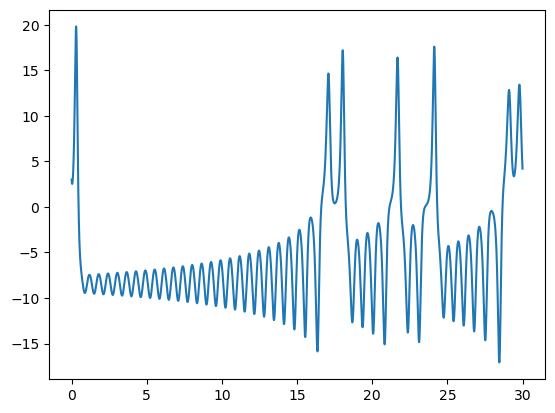

In [36]:
plt.plot(t,x)
plt.show()

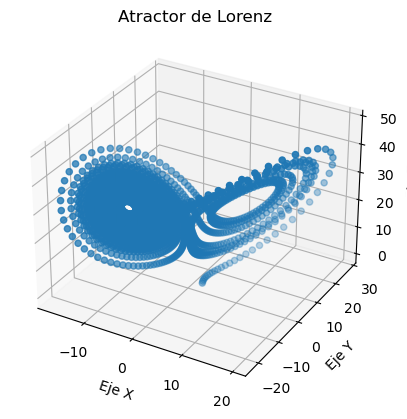

In [37]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.title("Atractor de Lorenz")

plt.show()